In [ ]:
# Install necessary packages

# !pip install keras 
# !pip install scikit-learn
# !pip install numpy
# !pip install matplotlib

In [1]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.metrics import AUC
from sklearn.model_selection import train_test_split
from utils import get_image_properties
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Global Variables 
batch_size = 40
resize_dim = (208, 208)

# Import training dataset
features, target, example_images = get_image_properties('./dataset/train', resize_dim)


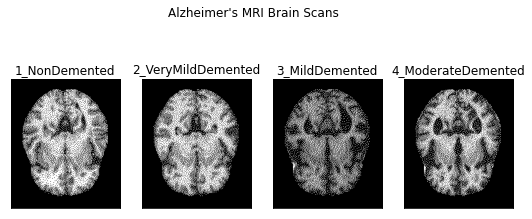

In [3]:
# Show alzheimer's mri scan labels 
fig, subplot = plt.subplots(nrows=1, ncols=4, figsize=(9,4))
subplot = subplot.flatten()

for i in range(len(example_images)):
    image, name = example_images[i]
    subplot[i].imshow(image, cmap='gray')
    subplot[i].set_xticks([])
    subplot[i].set_yticks([])
    subplot[i].set_title(name)

plt.suptitle("Alzheimer's MRI Brain Scans")
plt.show()


In [4]:
# Split dataset into features and target labels
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25)


In [5]:
# Reshape training data
features_train = features_train.reshape(features_train.shape[0], 208, 208, 1)
features_test = features_test.reshape(features_test.shape[0], 208, 208, 1)

features_train = features_train.astype('float32')
features_test = features_test.astype('float32')


In [6]:
# Transform numerical labels to binary vectory array
target_train = to_categorical(target_train, 4)
target_test = to_categorical(target_test, 4)


In [7]:
# Create Convolution Neural Network 
model = Sequential()
# ----- Layer 1 -----
model.add(Conv2D(32, (3,3), input_shape=(208, 208, 1), activation='relu', kernel_initializer='he_uniform', padding='same'))
# ----- Layer 2 -----
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# ----- Layer 3 -----
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# ----- Layer 4 -----
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Tranform 2D array --> 1D array 
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))


In [8]:
# Create Deep Neural Network 
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))


In [9]:
# Fit training data onto neural network model 

# Note: Using AUC over standard accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[AUC(name='auc')])
model.fit(features_train, target_train, epochs=4, batch_size=batch_size, validation_data=(features_test, target_test))


Epoch 1/4
96/96 [==============================] - 26s 203ms/step - loss: 1.1067 - auc: 0.8034 - val_loss: 1.2648 - val_auc: 0.8086
Epoch 2/4
96/96 [==============================] - 18s 191ms/step - loss: 0.3561 - auc: 0.9783 - val_loss: 1.0845 - val_auc: 0.8849
Epoch 3/4
96/96 [==============================] - 18s 188ms/step - loss: 0.1716 - auc: 0.9943 - val_loss: 0.5278 - val_auc: 0.9530
Epoch 4/4
96/96 [==============================] - 18s 187ms/step - loss: 0.0887 - auc: 0.9988 - val_loss: 0.3331 - val_auc: 0.9794


In [10]:
# Check accuracy and loss of model using test data set
results = model.evaluate(features_test, target_test, use_multiprocessing=True)
print("Training test results:", results)


41/41 [==============================] - 3s 34ms/step - loss: 0.3331 - auc: 0.9794
Training test results: [0.3330570459365845, 0.9793677926063538]


In [11]:
# Test mode with different dataset
print("Testing model with test dataset...\n")
test_features, test_target, _ = get_image_properties('./dataset/test', resize_dim)

test_features = test_features.reshape(test_features.shape[0], 208, 208, 1)
test_features = test_features.astype('float32')
test_target = to_categorical(test_target, 4)

# Evaluate test dataset 
results = model.evaluate(test_features, test_target, use_multiprocessing=True)
print("Target test results:", results)


Testing model with test dataset...

40/40 [==============================] - 3s 71ms/step - loss: 1.3593 - auc: 0.8465
Target test results: [1.3593311309814453, 0.8465108275413513]


1/1 [==============================] - 0s 19ms/step
Prediction label: 0
Expected label: 0
Convolutional neural network predicted output label with probability = 0.9672755
Label name: 1_NonDemented


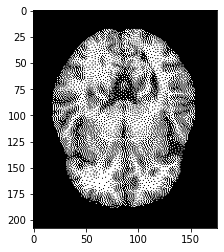

In [38]:
feature = np.array([np.array(test_features[0])])
feature = feature.reshape(feature.shape[0], 208, 208, 1)
expected_label = target[0]
img, name = example_images[0]

prediction = model.predict(feature)
prediction_label = np.argmax(prediction)

print('Prediction label:', prediction_label)
print('Expected label:', expected_label)
print(f'Convolutional neural network predicted output label with probability =', prediction[0][prediction_label])
print(f'Label name: {name}')
plt.imshow(img, cmap='gray')
plt.show()
